## Experiment reporter
* Tool for analysing the experiment results, stored in loggers
* Multiple experiments can be performed on the same data, each having its own logger
    * In our case, we have a reference model and a retraining one, comparing the effects of model retraining

In [3]:
import pickle
from detector.reporter import Reporter

workflow = "double"
#Load experiment logs and pass them to the reporter
with open('logs_tls.pkl', 'rb') as inp:
    logger_drift = pickle.load(inp)
    logger_ref = pickle.load(inp)
try:
    reporter = Reporter([logger_drift,logger_ref], ["Retraining model", "Reference model"], chunk_length=7)
except Exception as e:
    workflow = "single"
    reporter_drift = Reporter([logger_drift], ["Retraining model"], chunk_length=7)
    reporter_ref = Reporter([logger_ref], ["Reference model"], chunk_length=7)

### Global overview of the experiment results
Show how the experiments were defined and get the broad overview of experiment results

In [4]:
if workflow == "double":
    reporter.print_experiment_overview()
elif workflow == "single":
    reporter_ref.print_experiment_overview()
    reporter_drift.print_experiment_overview()

1 experiments were performed, each with 348 rounds of detection,
done between 2022-01-08 00:00:00 and 2022-12-28 00:00:00


,drift_detection_count,drift_strength_mean,drift_strength_std,share_drifted_features_mean,share_drifted_features_std,f1_mean,f1_std
experiment,,,,,,,
Reference model,191,0.053091,0.030371,0.142617,0.144046,0.546458,0.130457



The experiments and their tests were defined as follows:
Experiment 0: Reference model
Reference model trained on week 1 with no retraining
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Drift analyser test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weigh

,drift_detection_count,drift_strength_mean,drift_strength_std,share_drifted_features_mean,share_drifted_features_std,f1_mean,f1_std
experiment,,,,,,,
Retraining model,33,0.02913,0.012063,0.032036,0.065672,0.857492,0.032947



The experiments and their tests were defined as follows:
Experiment 0: Retraining model
Retraining model
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Drift analyser test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is high

 * In our case, we are comparing the model with and without retraining. 
 * Plotting global results leads to the first overview of differences between the experiments
    * The style of this graph cen be user defined

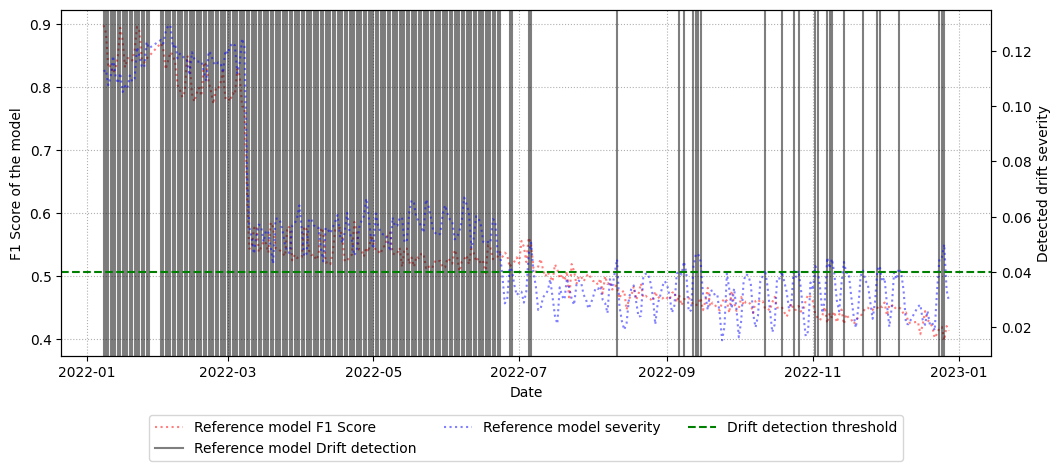

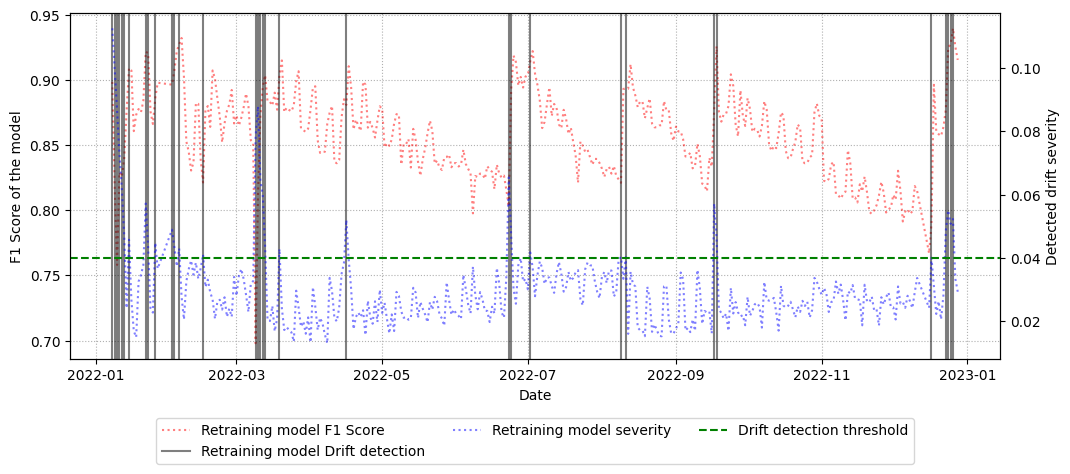

In [5]:
if workflow == "double":
    figure = reporter.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )
elif workflow == "single":
    figure = reporter_ref.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )
    figure = reporter_drift.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

### Chunk by chunk analysis
One may split the results into chunks (for example weeks) to quickly discover interesting parts of the data to further study

* Here, we can notice the third week has interesting behaviour for further analysis

In [7]:
if workflow == "double":
    for r in reporter.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
        display(r)
elif workflow == "single":
    for r in reporter_ref.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
        display(r)
    for r in reporter_drift.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
        display(r)

,Ratio_of_drift_detections,Mean_drift_strength,Mean_ratio_of_drifted_features,Mean_f1_score
Chunk,,,,
3,1.000000,0.124041,0.400000,0.840134
7,1.000000,0.119914,0.375824,0.791840
2,1.000000,0.119361,0.375824,0.862064
4,1.000000,0.116883,0.376923,0.804923
6,1.000000,0.116110,0.371429,0.795865
5,1.000000,0.115477,0.370330,0.807709
0,1.000000,0.111525,0.329670,0.850578
1,1.000000,0.108598,0.319780,0.856290
18,1.000000,0.060473,0.263736,0.525145


,Ratio_of_drift_detections,Mean_drift_strength,Mean_ratio_of_drifted_features,Mean_f1_score
Chunk,,,,
0,0.857143,0.072025,0.156044,0.835248
8,0.571429,0.045814,0.086813,0.875675
23,0.285714,0.039751,0.142857,0.888625
2,0.571429,0.039656,0.118681,0.895040
49,0.333333,0.038298,0.100000,0.926932
7,0.142857,0.037706,0.035165,0.846165
4,0.142857,0.036323,0.020879,0.852722
48,0.428571,0.035951,0.058242,0.881392
24,0.142857,0.034762,0.053846,0.904124


### Drift type analysis results

Analysis results of Reference model experiment:
Drift_type
No_drift             283
Periodic_drift        36
Unknown_drift         12
Incremental_drift      9
Sudden_drift           8
Name: count, dtype: int64


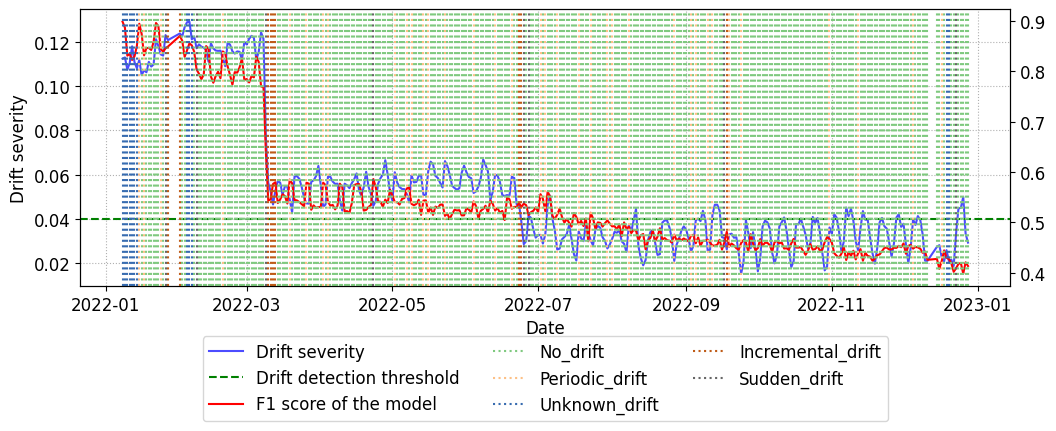

Analysis results of Retraining model experiment:
Drift_type
No_drift             279
Periodic_drift        36
Unknown_drift         14
Incremental_drift      9
Sudden_drift           8
Name: count, dtype: int64


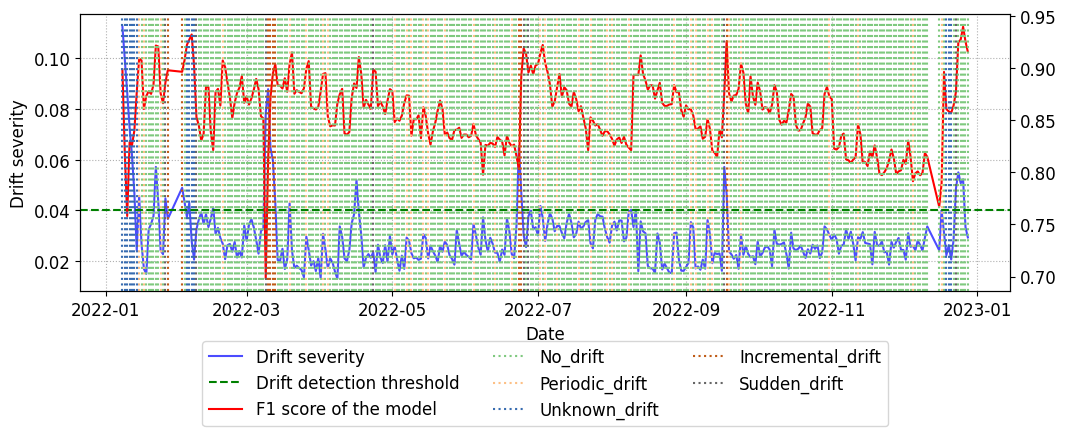

In [8]:
if workflow == "double":
    reporter.plot_analysis_results(detection_threshold = 0.04)
elif workflow == "single":
    reporter_ref.plot_analysis_results(detection_threshold = 0.04)
    reporter_drift.plot_analysis_results(detection_threshold = 0.04)

### Per class analysis
Analyse different classes and find potentially problematic ones. Automatic plotting of the most drifted classes can be done, or various manual plotting functions can be used to further examine interesting behaviour

* Here, we can look at the most drifted classes, then analyse the most correlated ones or examine the model retraining effects on the most drifted class

Most drifted classes:

Experiment Reference model
157    0.138017
136    0.194136
85     0.215777
110    0.220536
dtype: float64

 Compare F1 scores between experiments:


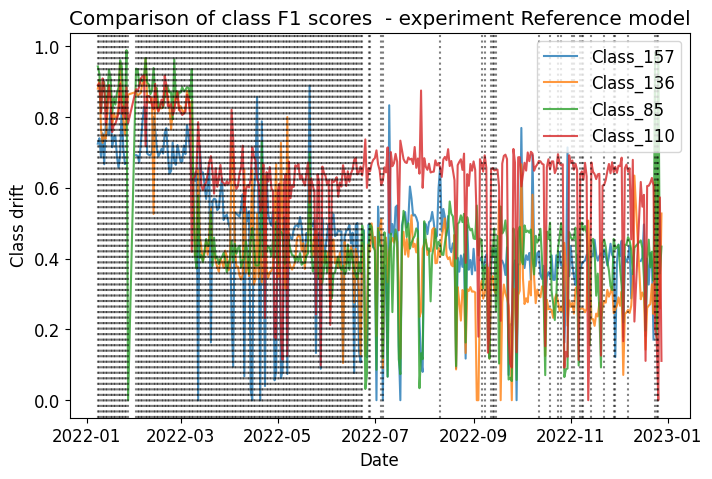

Compare drifts between experiments:


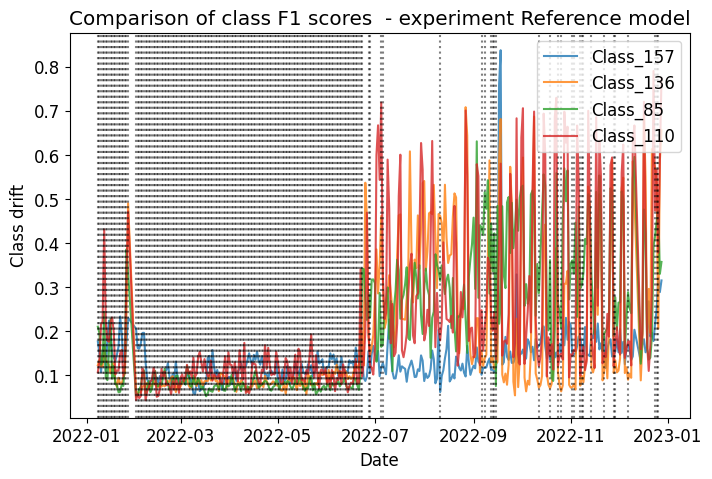

Class pairs with most correlated F1 scores
33  49     0.895820
57  75     0.894266
37  61     0.892055
49  57     0.886559
61  105    0.886496
40  47     0.883305
49  61     0.882386
37  49     0.875246
49  75     0.875047
82  140    0.873624
dtype: float64

Class pairs with most correlated drifts
47   123    0.939689
119  123    0.929593
47   119    0.912594
121  123    0.908918
104  123    0.904474
     119    0.901137
47   121    0.899424
120  123    0.897633
47   139    0.896386
     104    0.894003
dtype: float64
Most drifted classes:

Experiment Retraining model
136    0.378017
89     0.379720
157    0.385886
85     0.432872
dtype: float64

 Compare F1 scores between experiments:


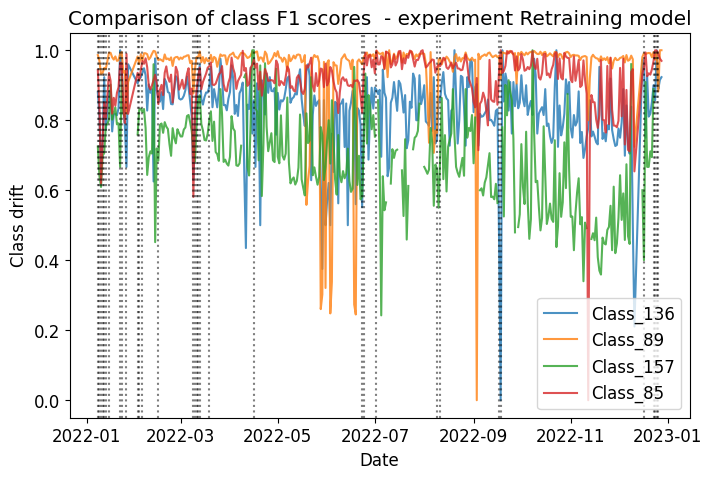

Compare drifts between experiments:


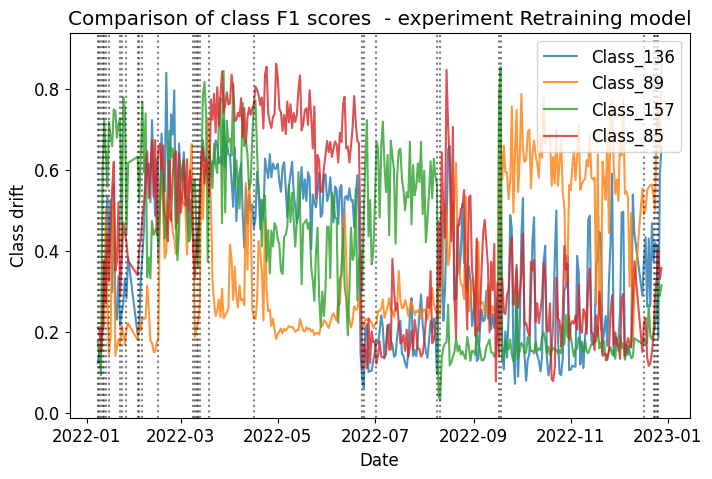

Class pairs with most correlated F1 scores
9   11     0.801256
64  67     0.779787
9   26     0.740825
51  58     0.735067
72  74     0.723728
62  67     0.716760
26  58     0.708999
11  58     0.707077
49  111    0.701088
62  64     0.693302
dtype: float64

Class pairs with most correlated drifts
85   136    0.802527
83   85     0.790709
     110    0.787688
85   110    0.774785
83   136    0.774267
27   85     0.764228
110  136    0.761585
41   156    0.749579
61   85     0.729849
58   98     0.726061
dtype: float64


In [9]:
if workflow == "double":
    reporter.analyse_class_drift(4)
elif workflow == "single":
    reporter_ref.analyse_class_drift(4)
    reporter_drift.analyse_class_drift(4)

In [16]:
#Example of multifeature support
#reporter_ref.plot_class("class_f1",[56,59,55])
#reporter_ref.plot_class("class_drift",[39,72])
#reporter_ref.plot_class_comparison([9,10])

### Per feature analysis
Analyse different features and find potentially problematic ones. 

Most drifted features:

Experiment Reference model
SIZE_4    0.199056
DIR_4     0.188294
SIZE_3    0.130448
SIZE_1    0.127605
dtype: float64

 Compare drifts between experiments:


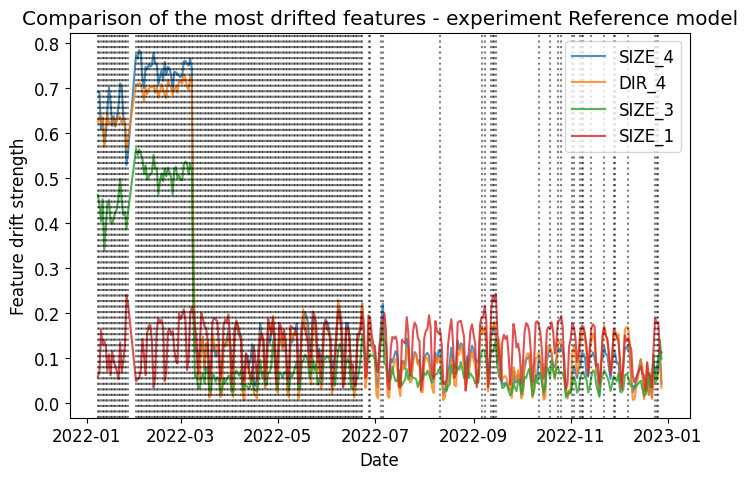

Most drifted features:

Experiment Retraining model
SIZE_1            0.083555
DIR_4             0.063800
SIZE_4            0.059967
PPI_ROUNDTRIPS    0.056107
dtype: float64

 Compare drifts between experiments:


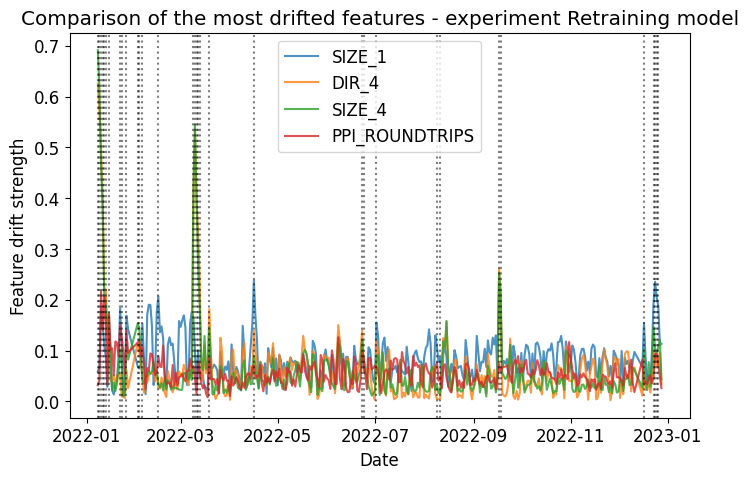

In [10]:
if workflow == "double":
    reporter.analyse_feature_drift(4)
elif workflow == "single":
    reporter_ref.analyse_feature_drift(4)
    reporter_drift.analyse_feature_drift(4)

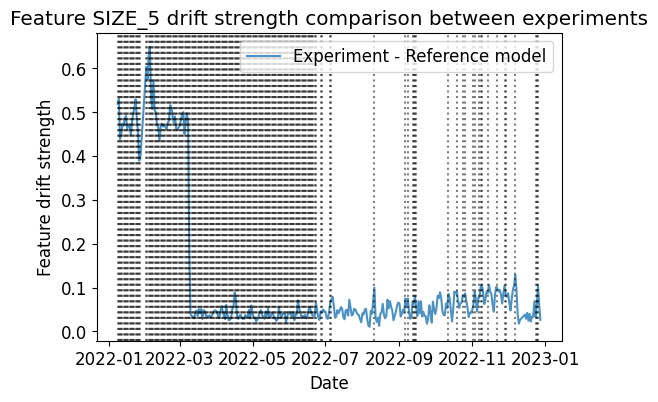

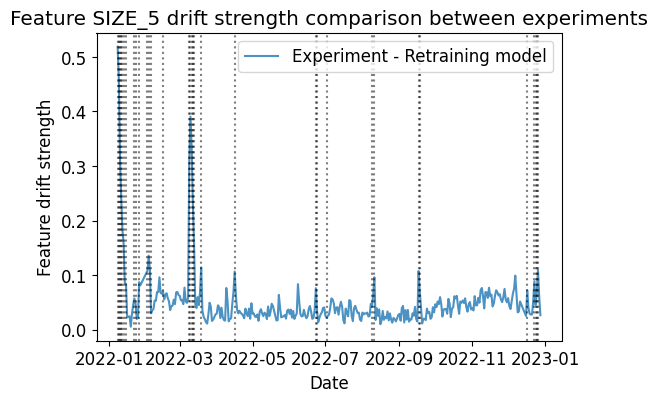

In [14]:
if workflow == "double":
    reporter.plot_feature_comparison("SIZE_4")
elif workflow == "single":
    reporter_ref.plot_feature_comparison("SIZE_4")
    reporter_drift.plot_feature_comparison("SIZE_1")

In [22]:
#Example of multifeature support
#reporter.plot_feature(["SIZE_5","DIR_3"])

# Detailed logs

In [15]:
drift_logs = logger_drift.get_logs()
ref_logs = logger_ref.get_logs()

In [19]:
#display(ref_logs["description"])
#display(ref_logs["overview"])
#display(ref_logs["test_info"])
#ref_logs["global_drift"]
#ref_logs["class_drift"]
#ref_logs["class_shares"]
#ref_logs["class_f1"]
#ref_logs["feature_drift"]

# Drift Log Analyser

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Get indexes of global drifts
drift_index = drift_logs["global_drift"][drift_logs["global_drift"]["is_drifted"] == True ].index

In [ ]:
from pprint import pprint 

def get_top_drifted_class(logger_data):
    tmp_data = logger_data["class_drift"].apply(ks_sample_drifted)
    tmp_max = []
    for c in tmp_data.columns:
        try:
            tmp_max.append({"class":c,"true_drift":tmp_data[c].value_counts()[True]})
        except Exception as e:
            tmp_max.append({"class":c,"true_drift": 0})
    return tmp_max

def get_top_drifted_feature(logger_data):
    tmp_data = logger_data["feature_drift"].apply(ws_feature_drifted)
    tmp_max = []
    for c in tmp_data.columns:
        try:
            tmp_max.append({"feature":c,"true_drift":tmp_data[c].value_counts()[True]})
        except Exception as e:
            tmp_max.append({"feature":c,"true_drift": 0})
    return tmp_max

In [ ]:
ks_drift_threshold_single = 0.05
ks_drift_threshold_global = 0.475
ws_drift_threshold_single = 0.1
ws_drift_threshold_global = 0.04

def ws_feature_drifted(metric):
    return metric > ws_drift_threshold_single

def ws_sample_drifted(metric):
    return metric > ws_drift_threshold_global

def ks_sample_drifted(metric):
    return metric < ks_drift_threshold_global

def ks_feature_drifted(metric):
    return metric < ks_drift_threshold_single

In [ ]:
drift_logs["global_drift"][drift_logs["global_drift"]["is_drifted"] == True ]

In [ ]:
ref_logs["global_drift"][ref_logs["global_drift"]["is_drifted"] == False ]

In [ ]:
# Celkovy pocet driftu
print("=== Drifts number ===")
print("Reference", ref_logs["global_drift"]["is_drifted"].value_counts())
print("Retraining", drift_logs["global_drift"]["is_drifted"].value_counts())
# nejvic N driftujicich trid
print("=== Top 5 drifted classes ===")
print("Reference")
top = get_top_drifted_class(ref_logs)
maxitem = sorted(top, key=lambda x:x["true_drift"],reverse=True)[:5]
pprint(maxitem)
print("Retraining")
top = get_top_drifted_class(drift_logs)
maxitem = sorted(top, key=lambda x:x["true_drift"],reverse=True)[:5]
pprint(maxitem)
# nejvic N driftujicich featur
print("=== Top 5 drifted features ===")
print("Reference")
top = get_top_drifted_feature(ref_logs)
maxitem = sorted(top, key=lambda x:x["true_drift"],reverse=True)[:5]
pprint(maxitem)
print("Retraining")
top = get_top_drifted_feature(drift_logs)
maxitem = sorted(top, key=lambda x:x["true_drift"],reverse=True)[:5]
pprint(maxitem)